In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
bb = pd.read_csv('breaking-bad.csv', sep=',')

In [6]:
bb.head()

,season,episode,title,year,votes,rating,us-viewers
0,1,1,Pilot,2008,23970,9.0,1.41
1,1,2,Cat's in the Bag...,2008,17267,8.7,1.49
2,1,3,...And the Bag's in the River,2008,16719,8.8,1.08
3,1,4,Cancer Man,2008,16211,8.3,1.09
4,1,5,Gray Matter,2008,15896,8.4,0.97


In [11]:
bb_train = bb.dropna()

In [12]:
features = ['rating']

In [13]:
dt_classification = DecisionTreeClassifier(max_depth = 2)

In [19]:
dt_classification.fit(bb_train[features], bb_train['title'])

DecisionTreeClassifier(max_depth=2)

In [20]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  
    graph = graphviz.Source(dot_data)  
    graph.render("decision_tree")
    return graph 

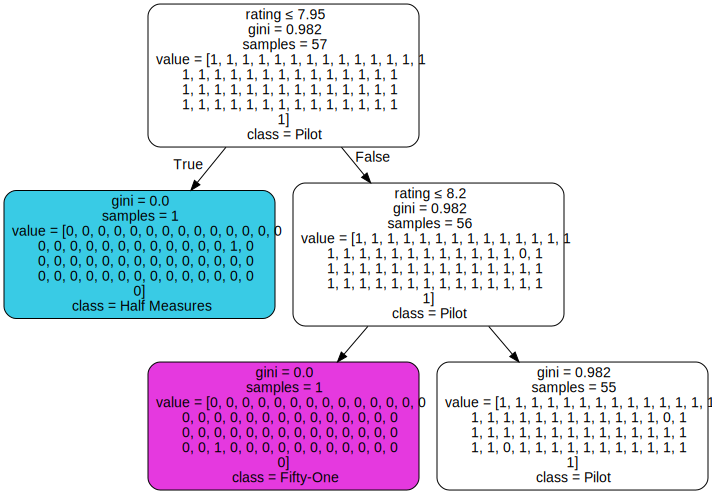

In [21]:
plot_tree_classification(dt_classification, features, bb.title.unique())

In [24]:
bb_train, bb_test = train_test_split(bb, test_size=0.3, stratify=bb['year'], random_state=42)
print(bb_train.shape, bb_test.shape)

(39, 7) (18, 7)


In [25]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [26]:
predictionsOnTrainset = dt_classification.predict(bb_train[features])
predictionsOnTestset = dt_classification.predict(bb_test[features])

In [27]:
accuracyTrain = calculate_accuracy(predictionsOnTrainset, bb_train['title'])
accuracyTest = calculate_accuracy(predictionsOnTestset, bb_test['title'])

In [28]:
print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.05128205128205128
Accuracy on test set 0.05555555555555555
